### Split training set and test set

In [25]:
import numpy as np
import pandas as pd

data = pd.read_excel('Classification iris.xlsx')
train_data = pd.DataFrame()
test_data = pd.DataFrame()

#Extract the first 70% index and concatenate to the data frame.
for category in data['class'].unique():
    category_data = data[data['class'] == category]
    split_index = int(len(category_data) * 0.7)
    train_data = pd.concat([train_data, category_data.iloc[:split_index]])
    test_data = pd.concat([test_data, category_data.iloc[split_index:]])

# extract the first column
training_set_ids = [insid for insid in train_data.iloc[:, 0]]
testing_set_ids = [insid for insid in test_data.iloc[:, 0]]
    
print("Q2.2.1 Split training set and test set:")
print("\nTraining set", training_set_ids)
print("\nTest set", testing_set_ids)

Q2.2.1 Split training set and test set:

Training set [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]

Test set [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150]


### SVD decomposition

In [27]:
X_train = train_data.drop(columns=['instance_id', 'class']).values
N = X_train.shape[0]

# mean vector
mean_vec = np.mean(X_train, axis=0)

centered_data = X_train - mean_vec
cov_matrix = np.dot(centered_data.T, centered_data) / N

# svd decomposition
U, S, V = np.linalg.svd(cov_matrix)

# build Q
Q = V.T


print("Q2.1.2 SVD decomposition:")
print(f"Mean vector:\n{mean_vec}\n")
print(f"Covariance matrix:\n{cov_matrix}\n")
print(f"Eigenvalues (vector):\n{S}\n")
print("Eigenvectors (matrix):\n", Q)



Q2.1.2 SVD decomposition:
Mean vector:
[5.89047619 3.05809524 3.80571429 1.18666667]

Covariance matrix:
[[ 0.71019501 -0.05001814  1.30319728  0.50244444]
 [-0.05001814  0.20719637 -0.3829034  -0.14170159]
 [ 1.30319728 -0.3829034   3.19901497  1.28779048]
 [ 0.50244444 -0.14170159  1.28779048  0.55791746]]

Eigenvalues (vector):
[4.30938932 0.2677887  0.07822324 0.01892255]

Eigenvectors (matrix):
 [[-0.3612084  -0.67668874  0.5437191   0.34057361]
 [ 0.09667266 -0.71059308 -0.61616041 -0.32566581]
 [-0.86000139  0.16246182 -0.06924822 -0.47875719]
 [-0.34724702  0.10371103 -0.56561522  0.74077186]]


### Project onto 1-dimensional subspace and reconstruct

In [29]:
variances_train = []
variances_test = []
reconstruction_losses_train = []
reconstruction_losses_test = []

In [30]:
X_test = test_data.drop(columns=['instance_id', 'class']).values

# centeralize
centered_X_train = X_train - mean_vec
centered_X_test = X_test - mean_vec

# project matrix, 1 dimention, we only choose the q1
W = Q[:, 0].reshape(-1, 1)

# map
X_train_mapped = np.dot(centered_X_train, W)
X_test_mapped = np.dot(centered_X_test, W)

# reconstruct
X_train_reconstruct = np.outer(X_train_mapped, W) + mean_vec
X_test_reconstruct = np.outer(X_test_mapped, W) + mean_vec

# variance
variance_train = ((X_train_reconstruct - mean_vec)**2).sum() / X_train_reconstruct.shape[0]
variance_test = ((X_test_reconstruct - mean_vec)**2).sum() / X_test_reconstruct.shape[0]

# loss
reconstruction_loss_train = np.mean((X_train - X_train_reconstruct)**2)
reconstruction_loss_test = np.mean((X_test - X_test_reconstruct)**2)

variances_train.append(variance_train)
variances_test.append(variance_test)
reconstruction_losses_train.append(reconstruction_loss_train)
reconstruction_losses_test.append(reconstruction_loss_test)


print("Q2.1.3 Project onto 1-dimensional subspace and reconstruct:")
print(f"Project matrix W: \n{W}")
print(f"\nShape of X_train mapped: {X_train_mapped.shape}, Shape of X_train reconstruct: {X_train_reconstruct.shape}")
print(f"Variance train: {variance_train}")
print(f"Reconstruction loss train: {reconstruction_loss_train}")
print(f"\nShape of X_test mapped: {X_test_mapped.shape}, Shape of X_test reconstruct: {X_test_reconstruct.shape}")
print(f"Variance test: {variance_test}")
print(f"Reconstruction loss test: {reconstruction_loss_test}")

Q2.1.3 Project onto 1-dimensional subspace and reconstruct:
Project matrix W: 
[[-0.3612084 ]
 [ 0.09667266]
 [-0.86000139]
 [-0.34724702]]

Shape of X_train mapped: (105, 1), Shape of X_train reconstruct: (105, 4)
Variance train: 4.3093893192470905
Reconstruction loss train: 0.09123362256917893

Shape of X_test mapped: (45, 1), Shape of X_test reconstruct: (45, 4)
Variance test: 3.938208761330033
Reconstruction loss test: 0.07494728056696186


### Project onto 2-dimensional subspace and reconstruct

In [32]:
# project matrix, 2d
W = Q[:, :2]

# map
X_train_mapped = np.dot(centered_X_train, W)
X_test_mapped = np.dot(centered_X_test, W)

# reconstruct
X_train_reconstruct = np.dot(X_train_mapped, W.T) + mean_vec
X_test_reconstruct = np.dot(X_test_mapped, W.T) + mean_vec

# variance
variance_train = ((X_train_reconstruct - mean_vec)**2).sum() / X_train_reconstruct.shape[0]
variance_test = ((X_test_reconstruct - mean_vec)**2).sum() / X_test_reconstruct.shape[0]


# loss
reconstruction_loss_train = np.mean((X_train - X_train_reconstruct)**2)
reconstruction_loss_test = np.mean((X_test - X_test_reconstruct)**2)

variances_train.append(variance_train)
variances_test.append(variance_test)
reconstruction_losses_train.append(reconstruction_loss_train)
reconstruction_losses_test.append(reconstruction_loss_test)

print("Q2.1.4 Project onto 2-dimensional subspace and reconstruct:")
print(f"Project matrix W: \n{W}")
print(f"\nShape of X_train mapped: {X_train_mapped.shape}, Shape of X_train reconstruct: {X_train_reconstruct.shape}")
print(f"Variance train: {variance_train}")
print(f"Reconstruction loss train: {reconstruction_loss_train}")
print(f"\nShape of X_test mapped: {X_test_mapped.shape}, Shape of X_test reconstruct: {X_test_reconstruct.shape}")
print(f"Variance test: {variance_test}")
print(f"Reconstruction loss test: {reconstruction_loss_test}")

Q2.1.4 Project onto 2-dimensional subspace and reconstruct:
Project matrix W: 
[[-0.3612084  -0.67668874]
 [ 0.09667266 -0.71059308]
 [-0.86000139  0.16246182]
 [-0.34724702  0.10371103]]

Shape of X_train mapped: (105, 2), Shape of X_train reconstruct: (105, 4)
Variance train: 4.577178016423881
Reconstruction loss train: 0.024286448274981283

Shape of X_test mapped: (45, 2), Shape of X_test reconstruct: (45, 4)
Variance test: 4.118472163233411
Reconstruction loss test: 0.029881430091117434


### Project onto 3-dimensional subspace and reconstruct

In [34]:
# project matrix, 2d
W = Q[:, :3]

# map
X_train_mapped = np.dot(centered_X_train, W)
X_test_mapped = np.dot(centered_X_test, W)

# reconstruct
X_train_reconstruct = np.dot(X_train_mapped, W.T) + mean_vec
X_test_reconstruct = np.dot(X_test_mapped, W.T) + mean_vec

# variance
variance_train = ((X_train_reconstruct - mean_vec)**2).sum() / X_train_reconstruct.shape[0]
variance_test = ((X_test_reconstruct - mean_vec)**2).sum() / X_test_reconstruct.shape[0]

# loss
reconstruction_loss_train = np.mean((X_train - X_train_reconstruct)**2)
reconstruction_loss_test = np.mean((X_test - X_test_reconstruct)**2)

variances_train.append(variance_train)
variances_test.append(variance_test)
reconstruction_losses_train.append(reconstruction_loss_train)
reconstruction_losses_test.append(reconstruction_loss_test)

print("Q2.1.5 Project onto 3-dimensional subspace and reconstruct:")
print(f"Project matrix W: \n{W}")
print(f"\nShape of X_train mapped: {X_train_mapped.shape}, Shape of X_train reconstruct: {X_train_reconstruct.shape}")
print(f"Variance train: {variance_train}")
print(f"Reconstruction loss train: {reconstruction_loss_train}")
print(f"\nShape of X_test mapped: {X_test_mapped.shape}, Shape of X_test reconstruct: {X_test_reconstruct.shape}")
print(f"Variance test: {variance_test}")
print(f"Reconstruction loss test: {reconstruction_loss_test}")

Q2.1.5 Project onto 3-dimensional subspace and reconstruct:
Project matrix W: 
[[-0.3612084  -0.67668874  0.5437191 ]
 [ 0.09667266 -0.71059308 -0.61616041]
 [-0.86000139  0.16246182 -0.06924822]
 [-0.34724702  0.10371103 -0.56561522]]

Shape of X_train mapped: (105, 3), Shape of X_train reconstruct: (105, 4)
Variance train: 4.655401260550287
Reconstruction loss train: 0.004730637243379994

Shape of X_test mapped: (45, 3), Shape of X_test reconstruct: (45, 4)
Variance test: 4.202126048952849
Reconstruction loss test: 0.008967958661258288


### Plotting

Q2.1.6 Plotting:
Dimension - Variance:


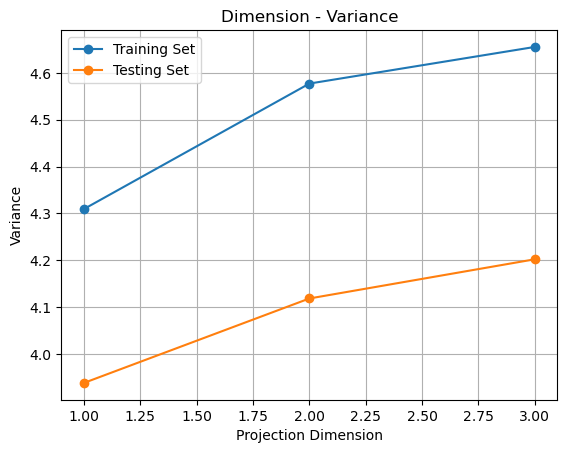

As the projection dimension increases, the variance of both the training set and the test set gradually increases. This is because more principal components retain more information of the original data.

Dimension - Reconstruction Loss:


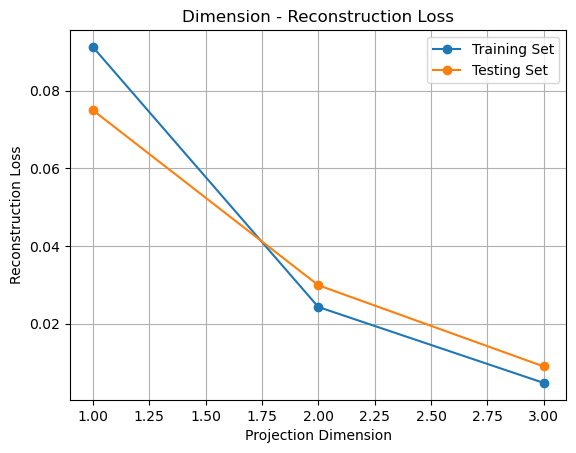

As the projection dimension increases, the reconstruction loss of both the training set and the test set gradually decreases. This is because more principal components make the reconstructed data closer to the original data.


In [36]:
import matplotlib.pyplot as plt
print("Q2.1.6 Plotting:")

dimensions = range(1, Q.shape[1])

# variances
print("Dimension - Variance:")

plt.plot(dimensions, variances_train, label='Training Set', marker='o')
plt.plot(dimensions, variances_test, label='Testing Set', marker='o')
plt.xlabel('Projection Dimension')
plt.ylabel('Variance')
plt.title('Dimension - Variance')
plt.legend()
plt.grid(True)
plt.show()

print("As the projection dimension increases, the variance of both the training set and the test set gradually increases. This is because more principal components retain more information of the original data.")

# loss
print("\nDimension - Reconstruction Loss:")

plt.plot(dimensions, reconstruction_losses_train, label='Training Set', marker='o')
plt.plot(dimensions, reconstruction_losses_test, label='Testing Set', marker='o')
plt.xlabel('Projection Dimension')
plt.ylabel('Reconstruction Loss')
plt.title('Dimension - Reconstruction Loss')
plt.legend()
plt.grid(True)
plt.show()

print("As the projection dimension increases, the reconstruction loss of both the training set and the test set gradually decreases. This is because more principal components make the reconstructed data closer to the original data.")